最优适应度值： [-6.40785505]
最优解： [[-4.         -0.75390497]]


Text(0.5, 1.0, 'WOA')

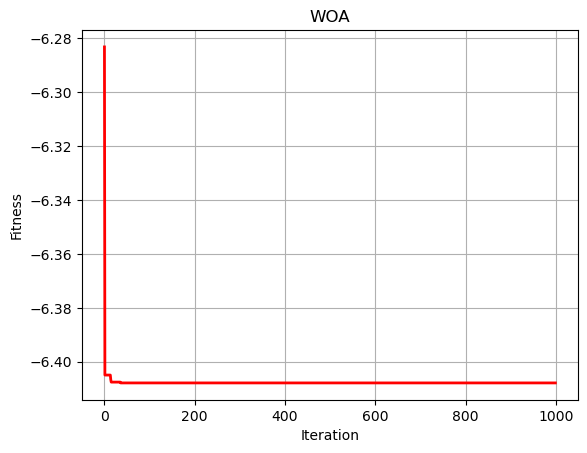

In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

"""优化函数"""


# y = x^2, 用户可以自己定义其他函数
# def fun(X):
#     output = sum(np.square(X))
#     return output


def fun(x):
    return 3 * np.cos(x[0] * x[1]) + x[0] + x[1] ** 2


""" 种群初始化函数 """


def initial(pop, dim, ub, lb):
    X = np.zeros([pop, dim])
    for i in range(pop):
        for j in range(dim):
            X[i, j] = random.random() * (ub[j] - lb[j]) + lb[j]

    return X, lb, ub


"""边界检查函数"""


def BorderCheck(X, ub, lb, pop, dim):
    for i in range(pop):
        for j in range(dim):
            if X[i, j] > ub[j]:
                X[i, j] = ub[j]
            elif X[i, j] < lb[j]:
                X[i, j] = lb[j]
    return X


"""计算适应度函数"""


def CaculateFitness(X, fun):
    pop = X.shape[0]
    fitness = np.zeros([pop, 1])
    for i in range(pop):
        fitness[i] = fun(X[i, :])
    return fitness


"""适应度排序"""


def SortFitness(Fit):
    fitness = np.sort(Fit, axis=0)
    index = np.argsort(Fit, axis=0)
    return fitness, index


"""根据适应度对位置进行排序"""


def SortPosition(X, index):
    Xnew = np.zeros(X.shape)
    for i in range(X.shape[0]):
        Xnew[i, :] = X[index[i], :]
    return Xnew


"""鲸鱼优化算法"""


def WOA(pop, dim, lb, ub, MaxIter, fun):
    X, lb, ub = initial(pop, dim, ub, lb)  # 初始化种群
    fitness = CaculateFitness(X, fun)  # 计算适应度值
    fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
    X = SortPosition(X, sortIndex)  # 种群排序
    GbestScore = fitness[0]
    GbestPositon = np.zeros([1, dim])
    GbestPositon[0, :] = X[0, :]
    Curve = np.zeros([MaxIter, 1])
    for t in range(MaxIter):
        Leader = X[0, :]  # 领头鲸鱼
        a = 2 - t * (2 / MaxIter)  # 线性下降权重2 - 0
        a2 = -1 + t * (-1 / MaxIter)  # 线性下降权重-1 - -2
        for i in range(pop):
            r1 = random.random()
            r2 = random.random()

            A = 2 * a * r1 - a
            C = 2 * r2
            b = 1
            l = (a2 - 1) * random.random() + 1

            for j in range(dim):
                p = random.random()
                if p < 0.5:
                    if np.abs(A) >= 1:
                        rand_leader_index = min(
                            int(np.floor(pop * random.random() + 1)), pop - 1
                        )
                        X_rand = X[rand_leader_index, :]
                        D_X_rand = np.abs(C * X_rand[j] - X[i, j])
                        X[i, j] = X_rand[j] - A * D_X_rand
                    elif np.abs(A) < 1:
                        D_Leader = np.abs(C * Leader[j] - X[i, j])
                        X[i, j] = Leader[j] - A * D_Leader
                elif p >= 0.5:
                    distance2Leader = np.abs(Leader[j] - X[i, j])
                    X[i, j] = (
                        distance2Leader * np.exp(b * l) * np.cos(l * 2 * math.pi)
                        + Leader[j]
                    )

        X = BorderCheck(X, ub, lb, pop, dim)  # 边界检测
        fitness = CaculateFitness(X, fun)  # 计算适应度值
        fitness, sortIndex = SortFitness(fitness)  # 对适应度值排序
        X = SortPosition(X, sortIndex)  # 种群排序
        if fitness[0] <= GbestScore:  # 更新全局最优
            GbestScore = fitness[0]
            GbestPositon[0, :] = X[0, :]
        Curve[t] = GbestScore

    return GbestScore, GbestPositon, Curve


"""主函数 """
# 设置参数
pop = 50  # 种群数量
MaxIter = 1000  # 最大迭代次数
dim = 2  # 维度
lb = -4 * np.ones([dim, 1])  # 下边界
ub = 4 * np.ones([dim, 1])  # 上边界

GbestScore, GbestPositon, Curve = WOA(pop, dim, lb, ub, MaxIter, fun)
print("最优适应度值：", GbestScore)
print("最优解：", GbestPositon)

# 绘制适应度曲线
plt.figure(1)
plt.plot(Curve, "r-", linewidth=2)
plt.xlabel("Iteration", fontsize="medium")
plt.ylabel("Fitness", fontsize="medium")
plt.grid()
plt.title("WOA", fontsize="large")